# Marketing Campaign Results

## Table of Contents

*  [Assignment](#assignment)
*  [Data Exploration](#data)
*  [Question 1](#q1)
*  [Question 2](#q2)
*  [Question 3](#q3)

<a id="assignment"></a>


## Assignment

Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

Assume the following:

* There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
* Channel mix, targeting, and efficiency are outside the scope of this exercise.
* There may be data provided that is not useful in your end presentation

<a id="data"></a>


## Exploratory Data Analysis


In [1]:
import pandas as pd

In [2]:
client_data = pd.read_csv("datasets/client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [3]:
deposit_data = pd.read_csv("datasets/deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
calendar_data = pd.read_csv("datasets/calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


The merging will be executed in 2 steps:
1. Merge the client and the deposit data frames on the client ID column
2. Merge the data frame from Step 1 with the calendar data set on the deposit_date/gergorian_date column

In [5]:
# Step 1
df = client_data.merge(deposit_data, on="client_id")
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01


In [6]:
# Step 2
df = df.merge(calendar_data, left_on="deposit_date", right_on = "gregorian_date", copy = False) 

In [7]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,2019-10-06,Month 5


As the result, there are 2 columns with same date which are gregorian_date and deposit_date, we drop the gregorian_date column

In [8]:
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5


Now we start exploring the dataset. We start with checking the properties of each column.

In [9]:
df["client_geographical_region"].value_counts()

client_geographical_region
West         205629
South        108004
Midwest       88185
Northeast     78576
Name: count, dtype: int64

In [10]:
df["client_residence_status"].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [12]:
df["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

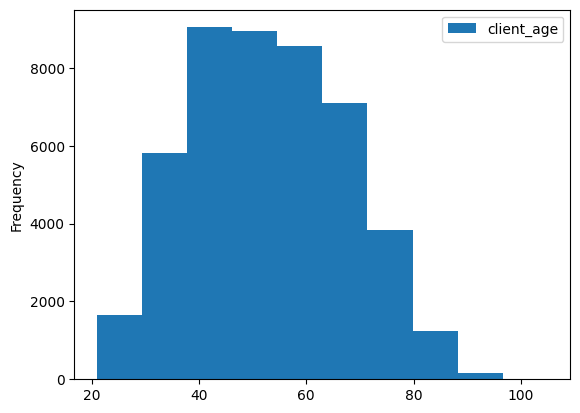

In [13]:
_ = client_data[["client_age"]].plot(kind="hist")

Most of the clients are between 40-60 years old

In [14]:
calendar_data["month_name"].value_counts()

month_name
Month 2    31
Month 3    31
Month 5    31
Month 1    30
Month 4    30
Name: count, dtype: int64

There are total 5 months' worth of data. Month 1 and 4 have only 30 days while the rest of months have 31 days

In [15]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

The data start from 2019-06-01 until 2019-10-31

Next, we check the type and cadence of the deposits

In [16]:
df["deposit_type"].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [17]:
df["deposit_cadence"].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

Next, we check the deposit amount. The following plots the sum of deposit grouped by month

In [18]:
# convert the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

In [20]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


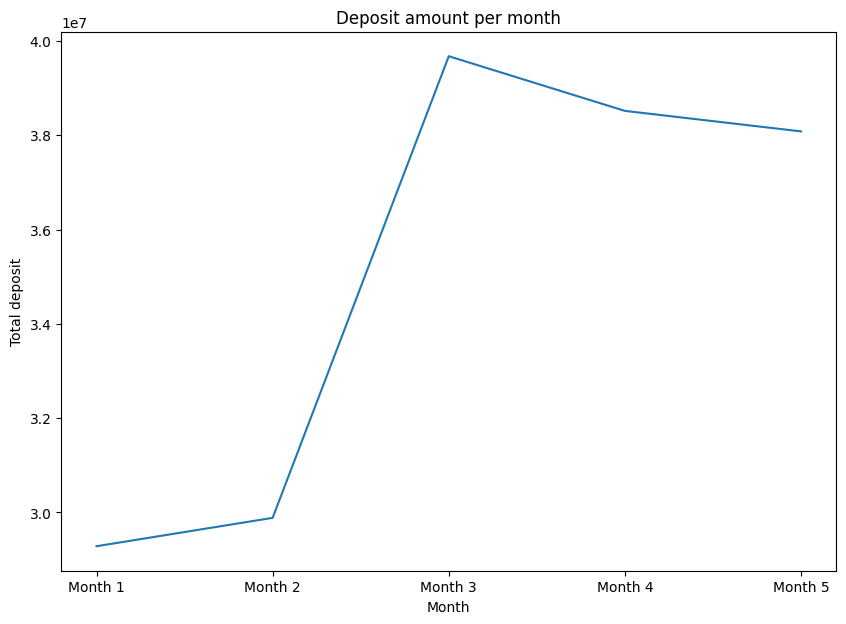

In [23]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount per month")
_ = plt.xlabel("Month")
_ = plt.ylabel("Total deposit")

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
dtype: int64


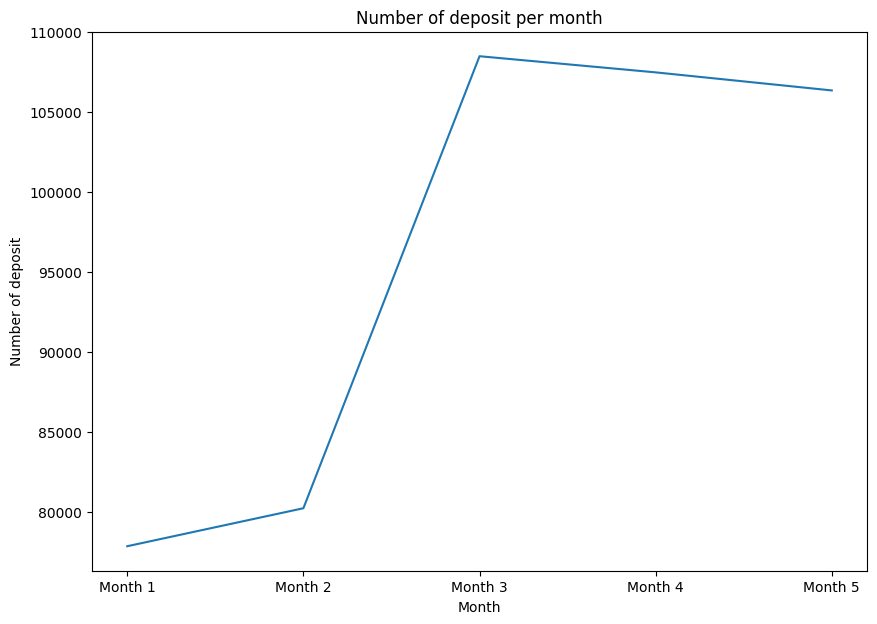

In [25]:
number_of_deposit_by_month = df.groupby(by=df["month_name"]).size()

print(number_of_deposit_by_month)

_ = plt.plot(number_of_deposit_by_month)
_ = plt.title("Number of deposit per month")
_ = plt.xlabel("Month")
_ = plt.ylabel("Number of deposit")

deposit_type
Actual Deposit       86077448.86
Scheduled Deposit    89365865.33
Name: deposit_amount, dtype: float64


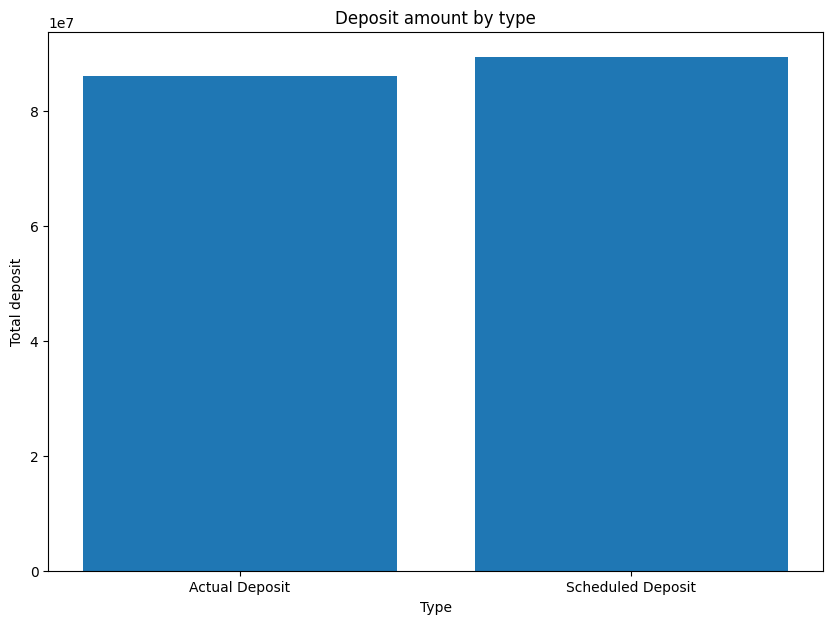

In [28]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()

print(deposit_amount_by_type)

_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
_ = plt.title("Deposit amount by type")
_ = plt.xlabel("Type")
_ = plt.ylabel("Total deposit")

deposit_cadence
Biweekly    4.897929e+07
Extra       5.862767e+06
Monthly     1.206013e+08
Name: deposit_amount, dtype: float64


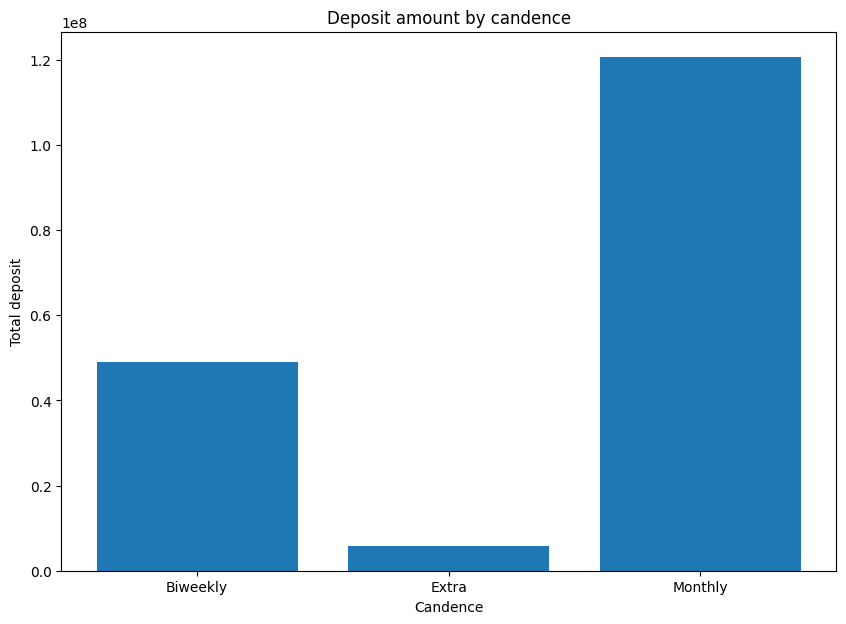

In [31]:
deposit_amount_by_candence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()

print(deposit_amount_by_candence)

_ = plt.bar(deposit_amount_by_candence.index, deposit_amount_by_candence)
_ = plt.title("Deposit amount by candence")
_ = plt.xlabel("Candence")
_ = plt.ylabel("Total deposit")

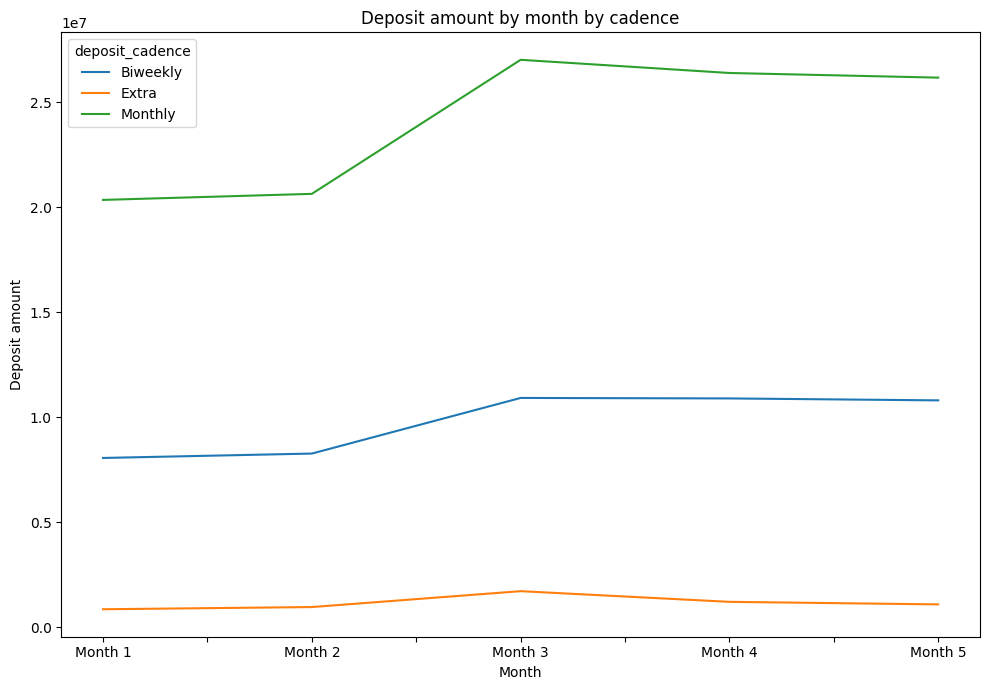

In [34]:
tmp_df = df.groupby(by=[df["deposit_cadence"],df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind="line")

ax.set_title("Deposit amount by month by cadence")
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
plt.tight_layout()

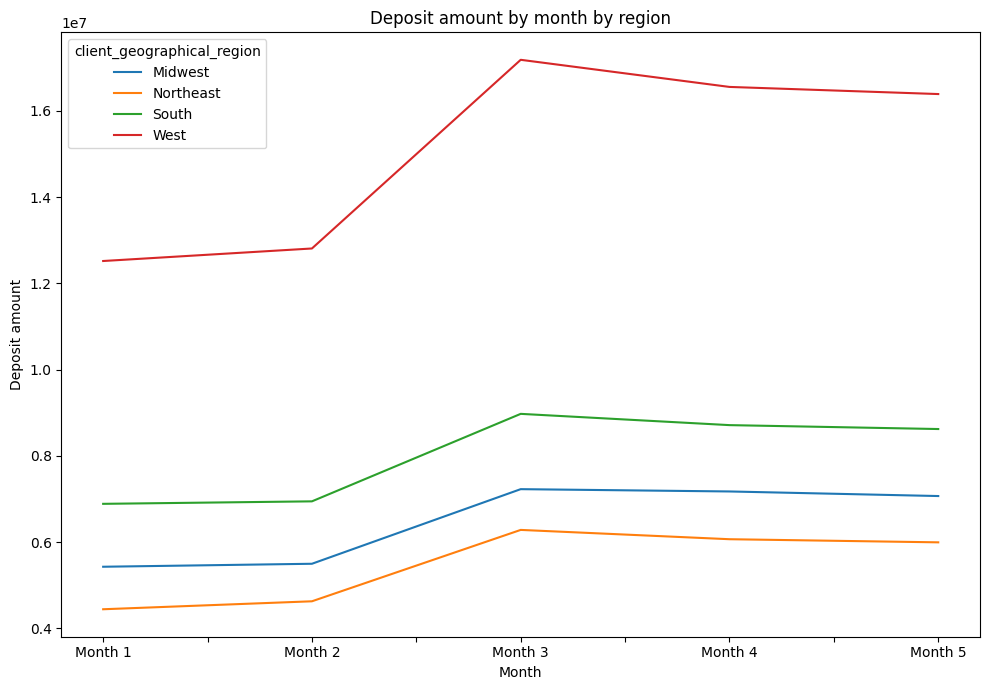

In [35]:
tmp_df = df.groupby(by=[df["client_geographical_region"],df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind="line")

ax.set_title("Deposit amount by month by region")
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
plt.tight_layout()

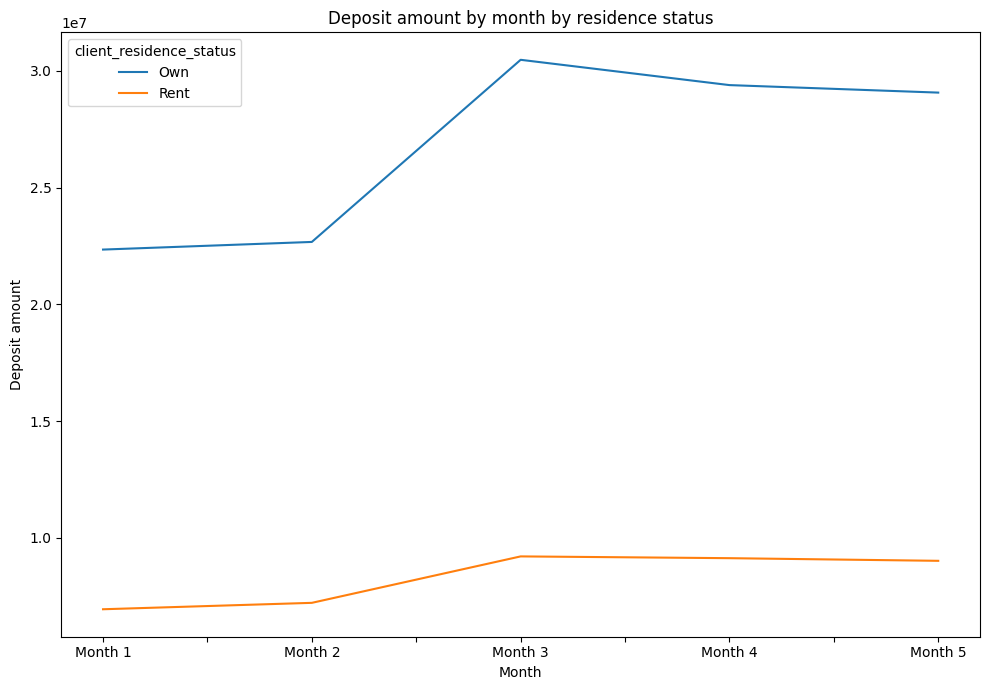

In [37]:
tmp_df = df.groupby(by=[df["client_residence_status"],df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind="line")

ax.set_title("Deposit amount by month by residence status")
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
plt.tight_layout()

Now we are familiar with the data, we proceed to solve the questions.

<a id="q1"></a>


### Question 1
#### Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

This question can already be answered from the plots in the previous sections, especially the ones that show the deposit amount per month. We know that the ad campaign was running during the 3rd month of our data set (which is Month 8 in the current year, i.e., August). A huge spike can be noticed in the line plot titled **"Deposit amount per month"** between months 7 & 8, i.e., while the campaign was running. Since then, the deposit amount has been slowly decreasing but has remained at very higher levels than before the campaign. To put this into numbers:

- During the month the campaign was running, Freedom Debt Relief received almost `$10 million` dollars increase in deposit amounts than previous months

- In the months following the campaign, the total deposit amount starts to slowly decrease, but is still at higher levels than before the ad campaign: `$8.5 million` in the month immediately following the campaign, and `$8 million` in the last month of the data

- The cost of the campaign was `$5 million`, and the incurred deposit amount increased by a total of `$26.5 million`. A quick Google search for "freedom debt relief pricing" reveals an `18-25%` fee incurred by the company for its services. We would assume that this is based on the residence status and the deposit cadence, but neither the data nor the task description provide any estimate or hint to this. Assuming the lowest, `18%` fee for all clients, we observe an increase in profits to `$4.77 million (26.5M * 18%)`. While this looks like a loss of `$230K` for the campaign, it is important to note that the trend shows this would have been much higher without the campaign, and it is very unlikely that the minimum fee is applied to all clients, so this number should be treated as the most pessimistic e  imate.
- 
Another quantitative assessment that we can make is to see the number of new clients that were brought in during and after the market campaign.

In [39]:
client_before_campaign = df[(df['month_name'] == 'Month 1')|
                           (df['month_name'] == 'Month 2')]['client_id'].unique()

client_before_campaign.shape

(34051,)

In [42]:
client_during_campaign = df[df['month_name'] == 'Month 3']['client_id'].unique()

client_during_campaign.shape

(43806,)

In [43]:
client_after_campaign = df[(df['month_name'] == 'Month 4')|
                           (df['month_name'] == 'Month 5')]['client_id'].unique()

client_after_campaign.shape

(41862,)

**Question**: How many new clients were acquired while the ad campaign was running?



A new client is one that has made his first deposit while the campaign was running.


In [46]:
len(set(client_during_campaign).difference(set(client_before_campaign)))

11544

**Question**: How many after the campaign?


In [48]:
len(set(client_after_campaign).difference(set(client_before_campaign).union(set(client_during_campaign))))

752

Another interesting insight that we can calculate is to see how the number of scheduled and actual deposits changes over time.



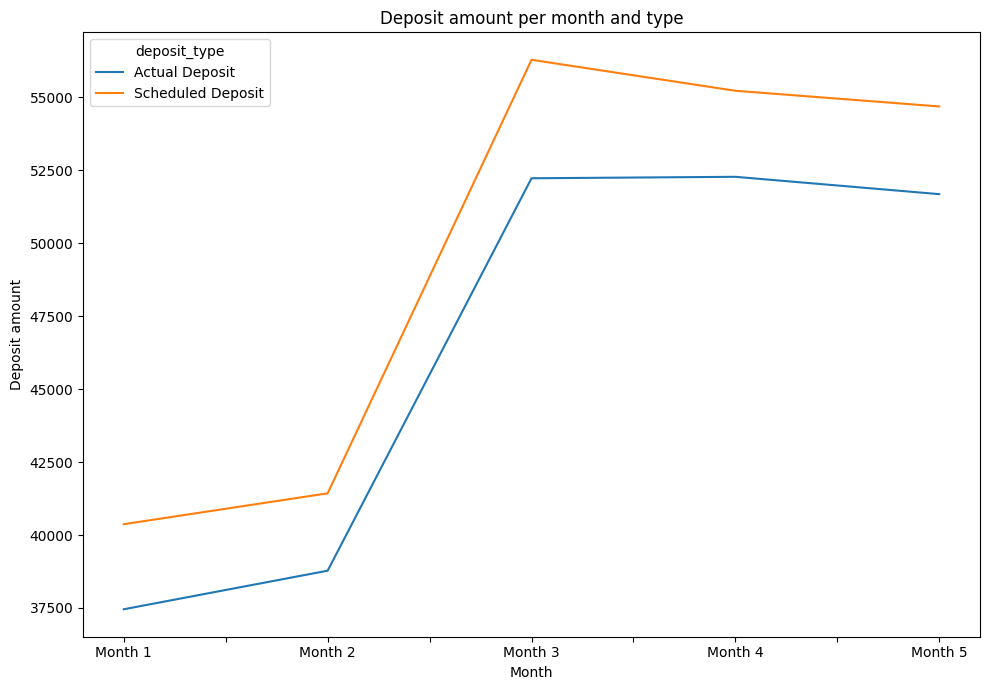

In [49]:
temp_df = df.groupby(by=[df["deposit_type"], df["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

As expected, this plot very closely matches the distributions of the plots in the analysis section. During the ad campaign, the number of actual and scheduled deposits increases for `25%`, or `10K` transactions, and while it gradually decreases in the next two months, it still remains very high, at above `50K` deposits per type each, while the pre-campaign levels were at around `40K`.

<a id="q2"></a>


### Question 2
**Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?**

Almost all of the plots show similar patterns through time and it is difficult to make any suggestions.

One thing that could be explored more is targeted marketing. We notice that most of the people in the data are middle-aged (40-60 years) and most of them are home owners. We can observe this in the age histogram and the count per residence status in the EDA section.

In the next plot, we will show the deposit amount changing through time and age group (age divided by 10).

In [50]:
def age_group(row):
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(age_group, axis=1)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5,8
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3,8
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3,8
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4,8
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4,8
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5,8


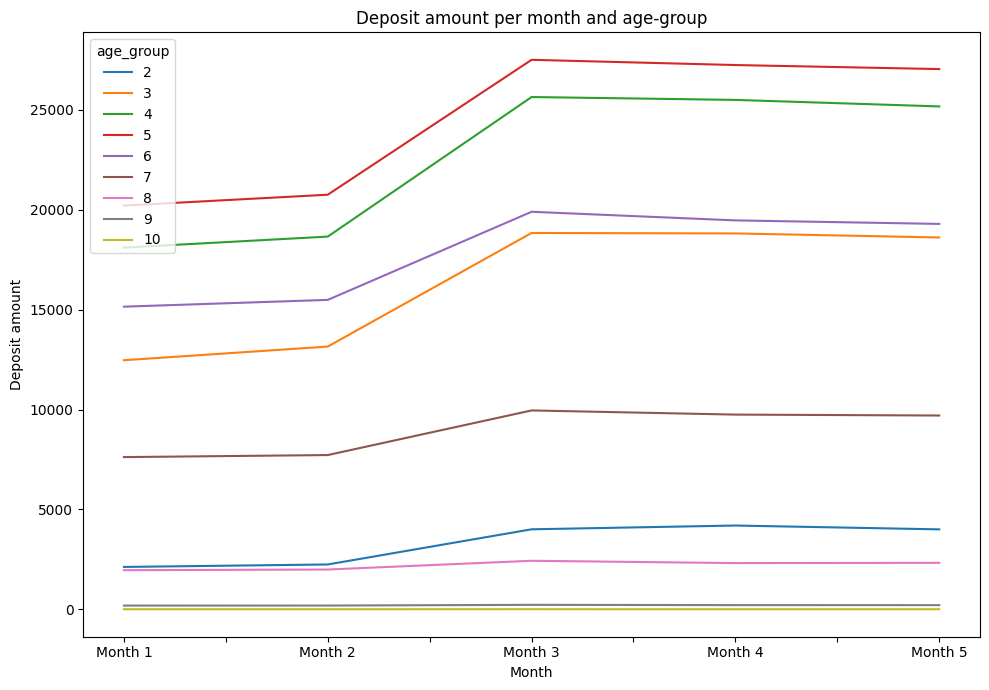

In [51]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe big increase in middle-aged customers and little to no increase in very young or very old customers. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [52]:
df_q2 = df[(df["client_residence_status"] == "Own") 
         & (df["client_age"] <= 60) 
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

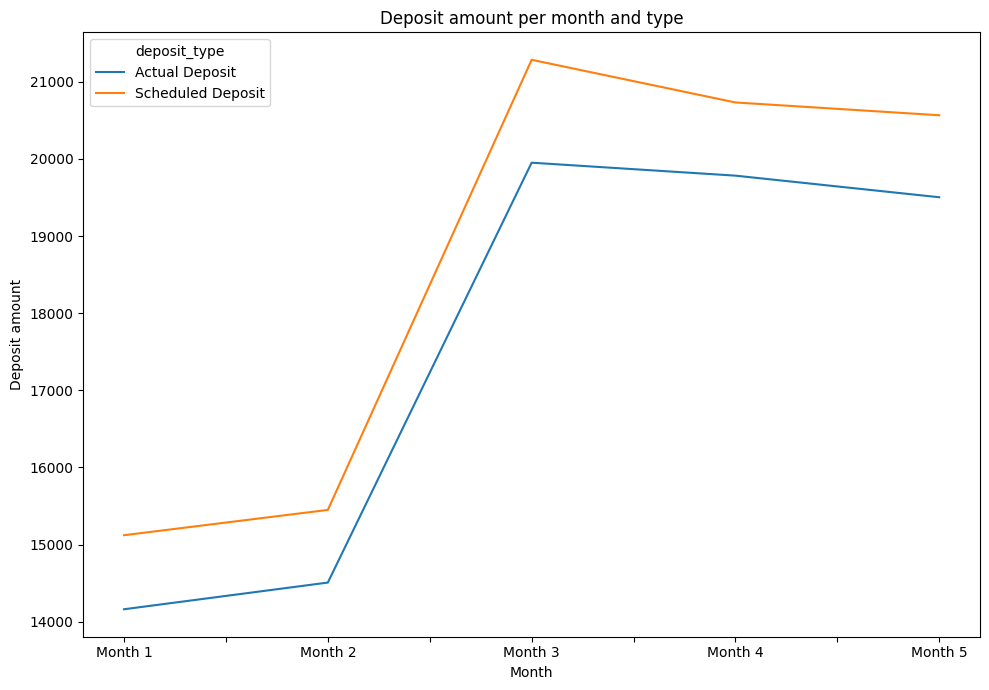

In [53]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.



In [54]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

extra_deposit_df_q2 / extra_deposit_df

0.4234867523021418

In [56]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

We can further explore the extra deposits to identify client groups that are of interest.



In [58]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

client_geographical_region
West         3570
South        1991
Midwest      1486
Northeast    1300
Name: count, dtype: int64

In [59]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

client_residence_status
Own     5856
Rent    2491
Name: count, dtype: int64

In [61]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

deposit_type
Actual Deposit    8347
Name: count, dtype: int64

In [62]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

month_name
Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: count, dtype: int64

Some key points based on the previous cells:

- Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well
- Clients who own their residence are approx. `2.33 times` as likely to deposit extra amount than clients who rent their residence
- Most extra deposits are observed in `Month 3`, when the campaign was running. Post-campaign numbers for extra deposits are `33%` higher than pre-campaign.

<a id="q3"></a>


### Question 3
**How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.**

One way we can simulate the postponement of the campaign is to "postpone" the deposits coming from new clients who were acquired during the third month. We (strongly) assume that the clients who made their first deposit in the third month in the data set are acquired due to the campaign; this is not necessarily correct, but for the sake of the exercise we can treat it as if it were.

Technically speaking, this means we should take the following steps.

1. Identify which clients made their first deposit in the third month, i.e., were acquired because of the campaign. (we have already done that in previous sections)
2. Postpone their deposits until after the fifth month, i.e., add exactly three months to the date of their deposit.
3. Re-run the same analyses from Question 1 and make summarise the difference in the results.

In [63]:
df_copy = df.copy(deep=True)

In [65]:
new_clients = set(client_during_campaign).difference(set(client_before_campaign))

In [66]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [67]:
df_copy["deposit_date"].max() 

Timestamp('2020-01-29 00:00:00')

We can now plot the same graphics as in the introductory EDA section.


Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


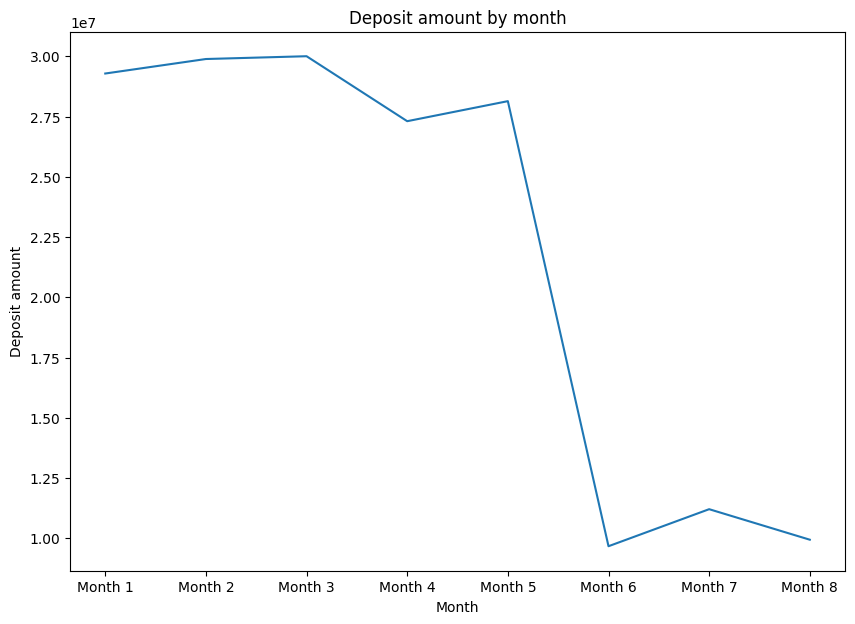

In [70]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots look a bit weird, because in months 6, 7, and 8 we have only the data coming from the new customers, and this is going to be much lower than usual.

To simulate the deposits coming from the existing customers, we can simply add an average deposit amount from the previous months.

In [71]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()

In [72]:
avg_monthly_deposit

21930414.27375

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


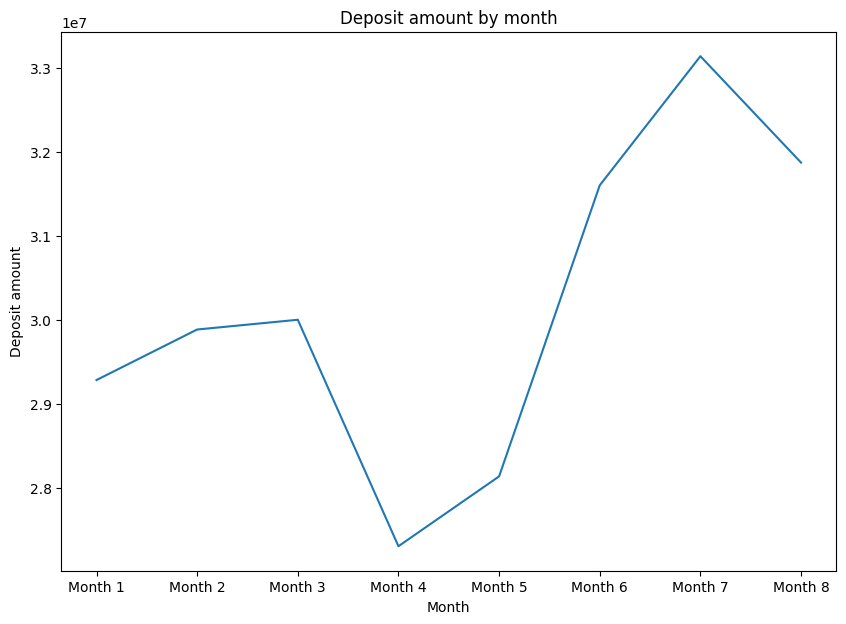

In [73]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()


deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)


_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in Question 1.

- During the month the campaign was running, Freedom Debt Relief received almost `$3.5 million` increase in deposit amounts than previous months, compared to `$10 million` in Question 1.

- In the month following the campaign, the total deposit amount continues to increase to reach its maximum at `$33 million`. In the last month, it drops to `$31 million` but remains on a higher level than pre-campaign.

- The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of `$8 million`. In Question 1 this number was much higher: `$26 million`, and we determined that that was borderline profitable. So, `$8 million` is much lower, and we conclude that postponing the campaign would have not been the right choice.